## Imports

In [1]:
# External libraries
import numpy as np
import uproot
import awkward as ak

In [2]:
# pyutils
sys.path.append('../EventNtuple/utils/pyutils')

import pyimport as pyim
import pyprint as prnt
import pyplot as plot

pr = prnt.Print()
pl = plot.Plot()

In [3]:
# anapytools
from anapytools.read_data import DataReader
rd = DataReader()

## Read data

In [4]:
class ReadRec:
    
    def __init__(self):
        """  Placeholder init """
        pass  
    
    # Class variable
    # treenames_ = ['runSummary', 'run', 'spills'] 
    treenames_ = ['run'] 
    
    def read(self, filename): 
    # def read(self, file): 
        # Open the file
        file = uproot.open(filename)
        # Get trees
        trees_ = {treename: file[treename] for treename in self.treenames_ if treename in file}
        # Load into array
        arrays_ = {} 
        for treename, tree in trees_.items():
            # arrays_[treename] = tree.arrays() # entire tree is far too large 
            arrays_[treename] = tree.arrays(filter_name=["eventNumber", "PEsTemperatureCorrected", "time"], library="ak")
        # Close file
        file.close()
        # Return
        return arrays_

In [5]:
# filename = '../Data/Reco/rec.mu2e.CRV_wideband_cosmics.crvaging-019.002100_000.root'
# Grab file from /pnfs
# filename='rec.mu2e.CRV_wideband_cosmics.CRVWB-000-010-000.002101_000.root'
# file = rd.read_file(filename)

In [6]:
# filename = '../Data/Reco/rec.mu2e.CRV_wideband_cosmics.crvaging-019.002100_000.root' # 1 hour 
filename = '../Data/Reco/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-010-000.002101_000.root' # 24 hour / 5 = ~5 hours
reader = ReadRec()
arrays_ = reader.read(filename)

In [7]:
# Rename PE
# arrays_["PEs"] = arrays_["PEsTemperatureCorrected"]

In [8]:
for treename in reader.treenames_:
    pr.PrintNEvents(arrays_[treename])


---> Printing 1 event(s)...

-------------------------------------------------------------------------------------
eventNumber: 1
PEsTemperatureCorrected: [[0.916, 0, 0, 0, 0, 0, 1.12, 0, ..., 0, 1.13, 48.2, 64.3, 0, 0, 0, 0], ...]
time: [[1.12e+03, nan, nan, nan, nan, nan, ..., 863, 859, nan, nan, nan, nan], ...]
-------------------------------------------------------------------------------------



## Stats

In [9]:
print("# Events:", len(arrays_['run']['PEsTemperatureCorrected'][:,0,0]))
print("# FEBs:", len(arrays_['run']['PEsTemperatureCorrected'][0,:,0]))
print("# channels:", len(arrays_['run']['PEsTemperatureCorrected'][0,0,:]))

# Events: 157287
# FEBs: 8
# channels: 64


In [10]:
# pr.PrintNEvents(arrays_['run'], 1)
print(ak.to_list(arrays_['run']['PEsTemperatureCorrected'][0]))
print(ak.to_list(arrays_['run']['time'][0]))

[[0.9161158800125122, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1167832612991333, 0.0, 162.32742309570312, 177.59483337402344, 0.9852291345596313, 1.0362268686294556, 0.0, 0.9842257499694824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.120856523513794, 0.0, 0.0, 84.29619598388672, 95.33411407470703, 66.63378143310547, 43.70131301879883, 0.0, 0.0, 1.124659776687622, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.921258807182312, 0.0, 1.1145744323730469, 0.0, 141.1728515625, 101.63581848144531, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9623023271560669, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1317665576934814, 48.152732849121094, 64.30586242675781, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.9175560474395752, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0811505317687988, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.897479772567749, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9212712645530701, 0.0, 0.0, 0.0, 1.186872124671936, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0460461378097534, 0.0, 

## Find coincidences 

In [11]:
# Time grouping 


## Plots 


---> Wrote:
	 hist.png


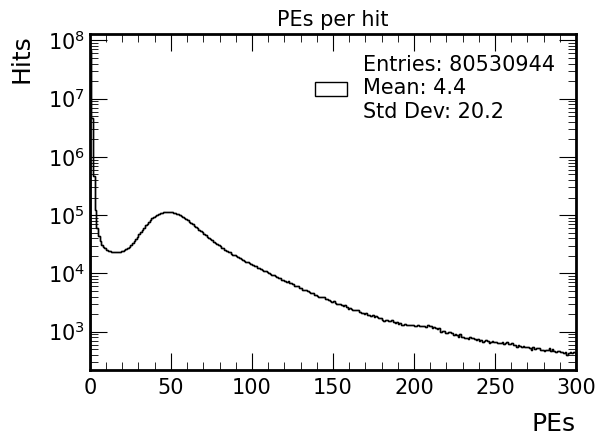


---> Wrote:
	 hist.png


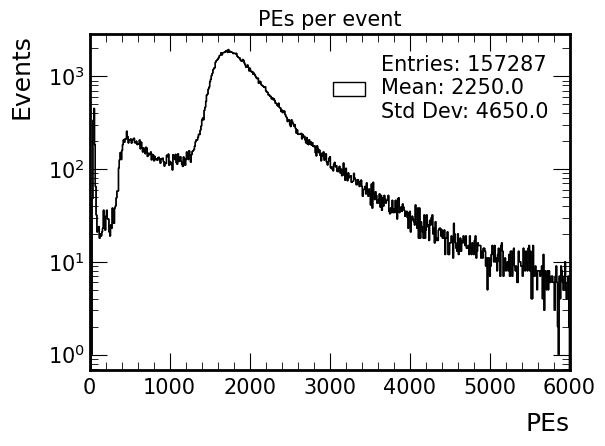


---> Wrote:
	 hist.png


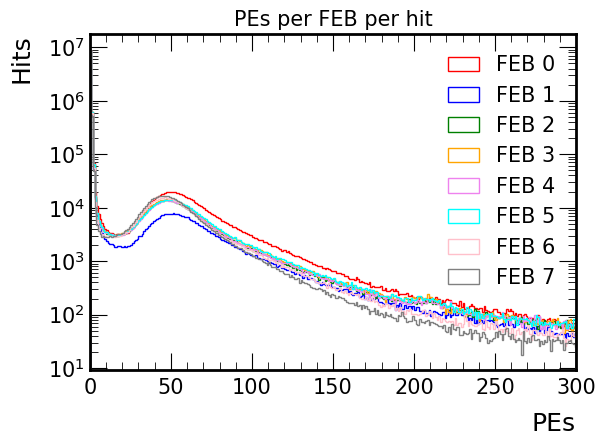


---> Wrote:
	 hist.png


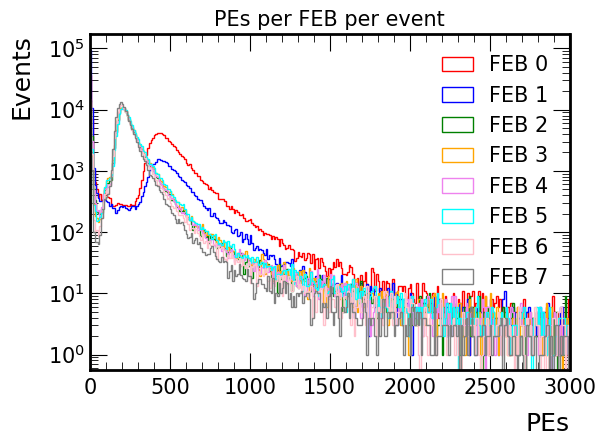

In [12]:
# PEs / hit 
# PEs / event
# PEs / FEB
# PEs / module 

PEs_per_hit_ = ak.flatten(arrays_['run']['PEsTemperatureCorrected'], axis=None)
pl.Plot1D(PEs_per_hit_, nbins=300, xmin=0, xmax=300, log_y=True, 
         xlabel='PEs', ylabel='Hits', title='PEs per hit')

arrays_['run']['PEsPerEvent'] = ak.sum(arrays_['run']['PEsTemperatureCorrected'], axis=-1)
arrays_['run']['PEsPerEvent'] = ak.sum(arrays_['run']['PEsPerEvent'], axis=-1) # deal with nesting
pl.Plot1D(ak.flatten(arrays_['run']['PEsPerEvent'], axis=None), 
          nbins=600, xmin=0, xmax=6000, log_y=True, 
          xlabel='PEs', ylabel='Events', title='PEs per event')

hists_ = {}
for i_feb in range(8): 
    hists_[f'FEB {i_feb}'] = ak.flatten(arrays_['run']['PEsTemperatureCorrected'][:,i_feb,:], axis=None)
pl.Plot1DOverlay(hists_, nbins=300, xmin=0, xmax=300, log_y=True, xlabel='PEs', ylabel='Hits', title='PEs per FEB per hit')


hists_ = {}
for i_feb in range(8): 
    arrays_['run'][f'FEB{i_feb}PEsPerEvent'] = ak.sum(arrays_['run']['PEsTemperatureCorrected'][:,i_feb,:], axis=-1)
    hists_[f'FEB {i_feb}'] = ak.flatten(arrays_['run'][f'FEB{i_feb}PEsPerEvent'], axis=None)
    
pl.Plot1DOverlay(hists_, nbins=300, xmin=0, xmax=3000, log_y=True, xlabel='PEs', ylabel='Events', title='PEs per FEB per event')


---> Wrote:
	 hist.png


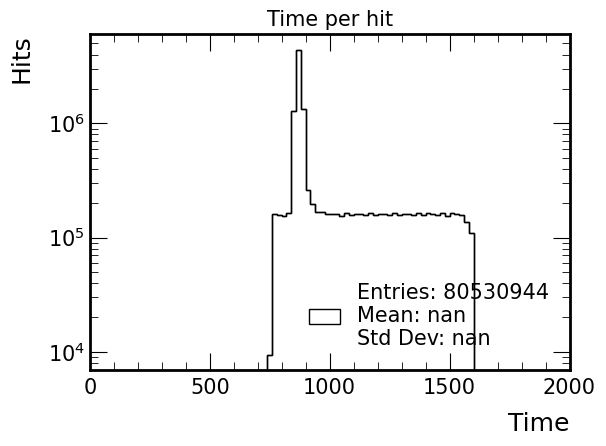


---> Wrote:
	 hist.png


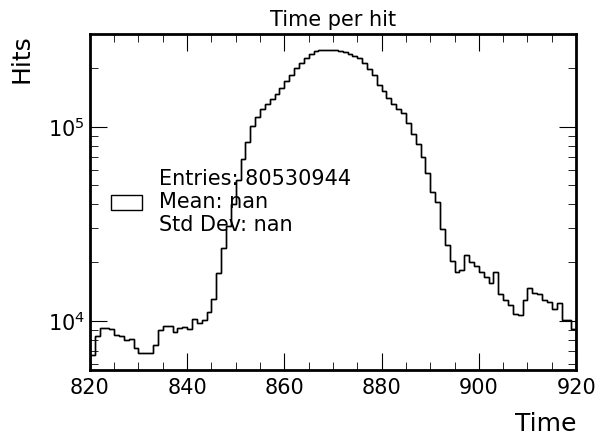


---> Wrote:
	 ../Images/h1o_time_per_FEB.png


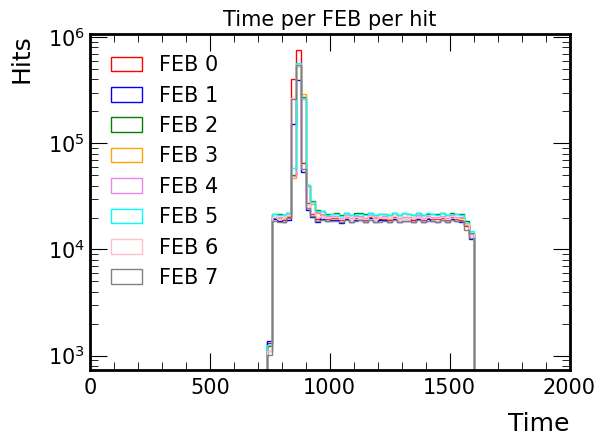

In [13]:
# Time / hit 
# Time / FEB 

time_per_hit_ = ak.flatten(arrays_['run']['time'], axis=None)
pl.Plot1D(time_per_hit_, nbins=100, xmin=0, xmax=2000, log_y=True, 
         xlabel='Time', ylabel='Hits', title='Time per hit')

pl.Plot1D(time_per_hit_, nbins=100, xmin=820, xmax=920, log_y=True, 
         xlabel='Time', ylabel='Hits', title='Time per hit')

time_hists_ = {}
for i_feb in range(8): 
    time_hists_[f'FEB {i_feb}'] = ak.flatten(arrays_['run']['time'][:,i_feb,:], axis=None)
pl.Plot1DOverlay(time_hists_, nbins=100, xmin=0, xmax=2000, log_y=True,
                 xlabel='Time', ylabel='Hits', title='Time per FEB per hit',
                 fout='../Images/h1o_time_per_FEB.png')


## Cuts

In [14]:
# Time cut
# Total PEs cut 
def tot_PEs_cut(arrays_): 
    arrays_['run'] = arrays_['run'][(arrays_['run']['PEsPerEvent'] < 3000)]
    return

# tot_PEs_cut(masked_arrays_)
# pr.PrintNEvents(arrays_['run'], 1)

In [15]:
print(ak.to_list(arrays_['run']['PEsTemperatureCorrected'][0,0,:])) #  = 
print()
# print(ak.to_list(arrays_['run']['time'][0,0,:][arrays_['run']['time'][0,0,:]])) 
# print(ak.to_list(arrays_['run']['time'][0,0,:][arrays_['run']['time'][0,0,:]>820])) 
mask = ak.mask(arrays_['run']['time'], (arrays_['run']['time']>820) & (arrays_['run']['time']<920) )
mask2 = ak.mask(arrays_['run']['PEsTemperatureCorrected'], (arrays_['run']['time']>820) & (arrays_['run']['time']<920) )
print(ak.to_list(arrays_['run']['time'][0,0,:])) 
print()
print(ak.to_list(mask[0,0,:]))
print()
print(ak.to_list(mask2[0,0,:]))

# arrays_['run']['PEsTemperatureCorrected'][(arrays_['run']['time'] > 820) & (arrays_['run']['time'] < 920) ]

[0.9161158800125122, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1167832612991333, 0.0, 162.32742309570312, 177.59483337402344, 0.9852291345596313, 1.0362268686294556, 0.0, 0.9842257499694824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.120856523513794, 0.0, 0.0, 84.29619598388672, 95.33411407470703, 66.63378143310547, 43.70131301879883, 0.0, 0.0, 1.124659776687622, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.921258807182312, 0.0, 1.1145744323730469, 0.0, 141.1728515625, 101.63581848144531, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9623023271560669, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1317665576934814, 48.152732849121094, 64.30586242675781, 0.0, 0.0, 0.0, 0.0]

[1124.5009765625, nan, nan, nan, nan, nan, 857.6136474609375, nan, 856.947021484375, 857.1365356445312, 871.2469482421875, 1324.494384765625, nan, 1530.750732421875, nan, nan, nan, nan, nan, nan, nan, 899.368896484375, nan, nan, 861.4284057617188, 857.4293823242188, 859.3036499023438, 857.4207763671875, nan, nan, 942.4298095703125, nan, nan, nan, nan, nan, nan, nan, 1003.6

In [16]:
# Total PEs cut 
def time_cut(arrays_): 
    mask = (arrays_['run']['time']>820) & (arrays_['run']['time']<920)  
    
    arrays_['run']['PEsTemperatureCorrected'] = ak.mask(
        arrays_['run']['PEsTemperatureCorrected'], mask
    )
    
    arrays_['run']['time'] = ak.mask(
        arrays_['run']['time'], mask
    )
    
    return

# tot_PEs_cut(masked_arrays_)
# pr.PrintNEvents(arrays_['run'], 1)

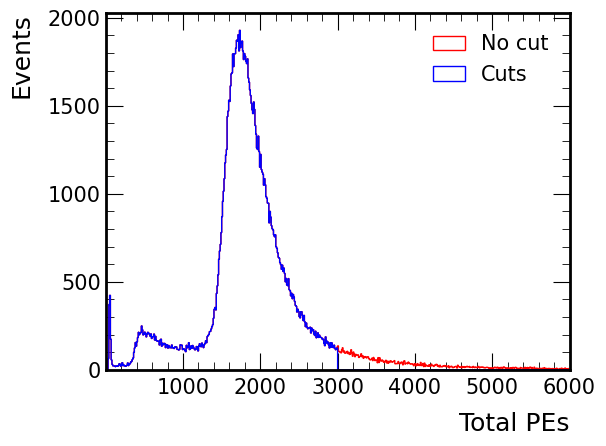

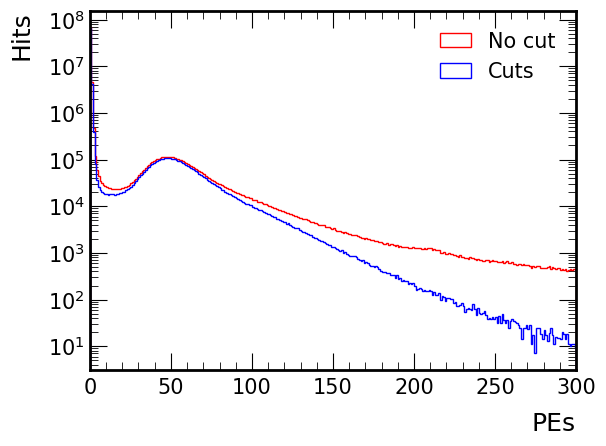

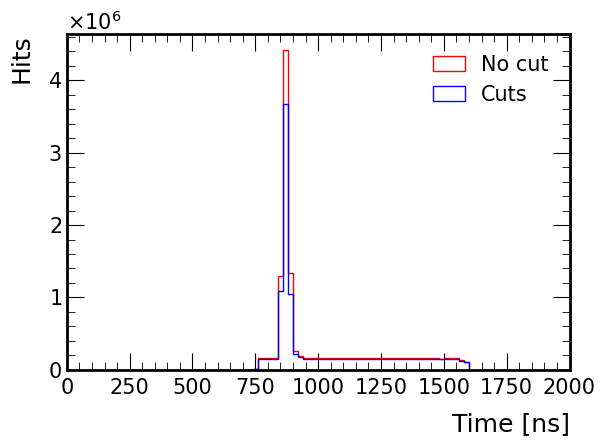

In [17]:
# Apply cuts

masked_arrays_ = ak.copy(arrays_)
# fid_cut(masked_arrays_)
# fid_cut(masked_arrays_)
tot_PEs_cut(masked_arrays_) 


# pr.PrintNEvents(arrays_['run'], 1)
# pr.PrintNEvents(masked_arrays_['run'], 1)

pl.Plot1DOverlay( { "No cut" : ak.flatten(arrays_['run']['PEsPerEvent'], axis=None), 
                   "Cuts" : ak.flatten(masked_arrays_['run']['PEsPerEvent'], axis=None), 
                  }, 
                 nbins=600, xmin=1, xmax=6000, 
                 xlabel='Total PEs', ylabel='Events',
                 save=False) 

# time_cut(masked_arrays_)

pl.Plot1DOverlay( { "No cut" : ak.flatten(arrays_['run']['PEsTemperatureCorrected'], axis=None), 
                   "Cuts" : ak.flatten(masked_arrays_['run']['PEsTemperatureCorrected'], axis=None), 
                  }, 
                 nbins=300, xmin=0, xmax=300, log_y=True,
                 xlabel='PEs', ylabel='Hits',
                 save=False) 

pl.Plot1DOverlay( { "No cut" : ak.flatten(arrays_['run']['time'], axis=None), 
                   "Cuts" : ak.flatten(masked_arrays_['run']['time'], axis=None), 
                  }, 
                 nbins=100, xmin=0, xmax=2000,
                 xlabel='Time [ns]', ylabel='Hits',
                 save=False) 

## Get PEs per layer per channel

In [18]:
# PEs per channel

# Slicing goes events:FEBs:channels

# CRV-DS goes left to right looking at the connector side. 
# CRV-T goes left to right from side B
# CRV-L-end goes left to right from side B


def get_PEs_per_channel(arrays_): 
    ''' Get PEs per layer per channel ''' 
    
    arrays_['run']['PEs_L_end_0'] = arrays_['run']['PEsTemperatureCorrected'][:,6,0:32] 
    arrays_['run']['PEs_L_end_1'] = arrays_['run']['PEsTemperatureCorrected'][:,6,32:64]
    arrays_['run']['PEs_L_end_2'] = arrays_['run']['PEsTemperatureCorrected'][:,7,0:32] 
    arrays_['run']['PEs_L_end_3'] = arrays_['run']['PEsTemperatureCorrected'][:,7,32:64]
    
    # CRV-DS (weird channel map, see https://docs.google.com/spreadsheets/d/1zcnOPcVqcXICQRvkaezWU5e04COF0k9hdntDU8LjwRI/edit?usp=sharing)
    arrays_['run']['PEs_DS_0'] = ak.concatenate([arrays_['run']['PEsTemperatureCorrected'][:,1,0:16], arrays_['run']['PEsTemperatureCorrected'][:,0,15::-1]], axis=-1) 
    arrays_['run']['PEs_DS_1'] = ak.concatenate([arrays_['run']['PEsTemperatureCorrected'][:,1,16:32], arrays_['run']['PEsTemperatureCorrected'][:,0,31:15:-1]], axis=-1) 
    arrays_['run']['PEs_DS_2'] = ak.concatenate([arrays_['run']['PEsTemperatureCorrected'][:,1,32:48], arrays_['run']['PEsTemperatureCorrected'][:,0,47:31:-1]], axis=-1)
    arrays_['run']['PEs_DS_3'] = ak.concatenate([arrays_['run']['PEsTemperatureCorrected'][:,1,48:64], arrays_['run']['PEsTemperatureCorrected'][:,0,63:47:-1]], axis=-1)
    
    # CRV-T (double ended connection
    arrays_['run']['PEs_T_0'] = (arrays_['run']['PEsTemperatureCorrected'][:,2,0:32] + arrays_['run']['PEsTemperatureCorrected'][:,4,0:32]) 
    arrays_['run']['PEs_T_1'] = (arrays_['run']['PEsTemperatureCorrected'][:,2,32:64] + arrays_['run']['PEsTemperatureCorrected'][:,4,32:64])
    arrays_['run']['PEs_T_2'] = (arrays_['run']['PEsTemperatureCorrected'][:,3,0:32] + arrays_['run']['PEsTemperatureCorrected'][:,5,0:32])
    arrays_['run']['PEs_T_3'] = (arrays_['run']['PEsTemperatureCorrected'][:,3,32:64] + arrays_['run']['PEsTemperatureCorrected'][:,5,32:64])

    return

get_PEs_per_channel(arrays_)
get_PEs_per_channel(masked_arrays_)

## Channel x-positions 

In [19]:
def get_x_pos(arrays_):
    ''' Get channel x-positions ''' 

    # Calculate base channel positions 
    
    counter_width = 51.34 # mm 
    layer_offset = 42.00 # mm 
    
    # Find the positions of the counters in x
    channels_ = np.linspace(0, 31, 32)
    channel_x_ = [] # channels_ + 1 * ( counter_width / 3 )
    counter_edge_x = 0
    for channel in channels_: 
        odd = channel % 2
        if not odd: 
            counter_edge_x += counter_width # right edge
            channel_x = counter_edge_x - (2/3 * counter_width)
        else: 
            counter_x = counter_edge_x - (1/3 * counter_width)
        # print(odd, channel, channel_x)
        channel_x_.append(channel_x)

    # Calculate x-positions per channel and append the array

    n_events = len(arrays_['run'])
    
    # Does copying this for every event really make sense? 
    # I just do this so that I can use them as a mask per event, at some point you would have to extend per event anyway? 
    
    # Being explicit here, leaving options to change layer x later
    # Do we really need to duplicate for every event to make our mask? 
    
    # CRV-DS x-positions the same across layers
    arrays_['run']['x_DS'] = ak.Array([[x + 8 * counter_width for x in channel_x_] for _ in range(n_events)])
    
    # CRV-T and CRV-L-end is shifted by layer offset
    arrays_['run']['x_TL_0'] = ak.Array([[x - 0*layer_offset for x in channel_x_] for _ in range(n_events)])
    arrays_['run']['x_TL_1'] = ak.Array([[x - 1*layer_offset for x in channel_x_] for _ in range(n_events)])
    arrays_['run']['x_TL_2'] = ak.Array([[x - 2*layer_offset for x in channel_x_] for _ in range(n_events)])
    arrays_['run']['x_TL_3'] = ak.Array([[x - 3*layer_offset for x in channel_x_] for _ in range(n_events)])

    return

get_x_pos(arrays_)
get_x_pos(masked_arrays_)

In [20]:
pr.PrintNEvents(arrays_['run'], 1)


---> Printing 1 event(s)...

-------------------------------------------------------------------------------------
eventNumber: 1
PEsTemperatureCorrected: [[0.916, 0, 0, 0, 0, 0, 1.12, 0, ..., 0, 1.13, 48.2, 64.3, 0, 0, 0, 0], ...]
time: [[1.12e+03, nan, nan, nan, nan, nan, ..., 863, 859, nan, nan, nan, nan], ...]
PEsPerEvent: 2314.47021484375
FEB0PEsPerEvent: 996.5687866210938
FEB1PEsPerEvent: 7.050375938415527
FEB2PEsPerEvent: 193.4090118408203
FEB3PEsPerEvent: 224.85037231445312
FEB4PEsPerEvent: 235.58810424804688
FEB5PEsPerEvent: 232.45237731933594
FEB6PEsPerEvent: 173.47691345214844
FEB7PEsPerEvent: 251.0741424560547
PEs_L_end_0: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1.07, 0, ..., 0, 0, 0.886, 0, 0, 0, 0, 0, 0, 0]
PEs_L_end_1: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 46.8, 45.1, 0, 0, 0, 0, 0, 1.19, 1.16, 0]
PEs_L_end_2: [0, 0, 0, 0.702, 0, 0, 0.868, 1.01, 0, ..., 1.51, 62.1, 56.4, 0, 1, 0, 0, 0, 0]
PEs_L_end_3: [0, 0, 0, 0, 0, 0, 0, 1.15, 0, 0, ..., 0, 0, 0, 0, 67.3, 55.9, 0, 0.903, 0, 0]
P

In [21]:
print(len(arrays_['run']['x_DS'][0]))
print(np.mean(arrays_['run']['x_DS'][0]) + 50)
print(np.mean(arrays_['run']['x_DS'][0]) - 50)
print(ak.to_list(arrays_['run']['x_DS'][0]))

32
862.8833333333336
762.8833333333336
[427.83333333333337, 427.83333333333337, 479.1733333333334, 479.1733333333334, 530.5133333333333, 530.5133333333333, 581.8533333333334, 581.8533333333334, 633.1933333333334, 633.1933333333334, 684.5333333333334, 684.5333333333334, 735.8733333333334, 735.8733333333334, 787.2133333333335, 787.2133333333335, 838.5533333333335, 838.5533333333335, 889.8933333333335, 889.8933333333335, 941.2333333333336, 941.2333333333336, 992.5733333333336, 992.5733333333336, 1043.9133333333336, 1043.9133333333336, 1095.2533333333336, 1095.2533333333336, 1146.5933333333337, 1146.5933333333337, 1197.9333333333338, 1197.9333333333338]



---> Wrote:
	 ../Images/h1o_CRV_DS_PEsPerLayer_vs_x.png


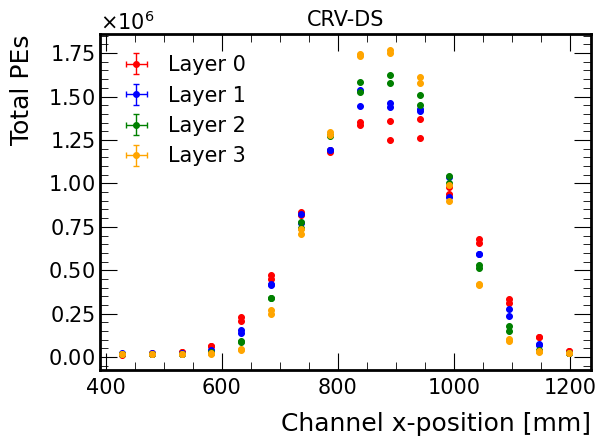


---> Wrote:
	 ../Images/h1o_CRV_T_PEsPerLayer_vs_x.png


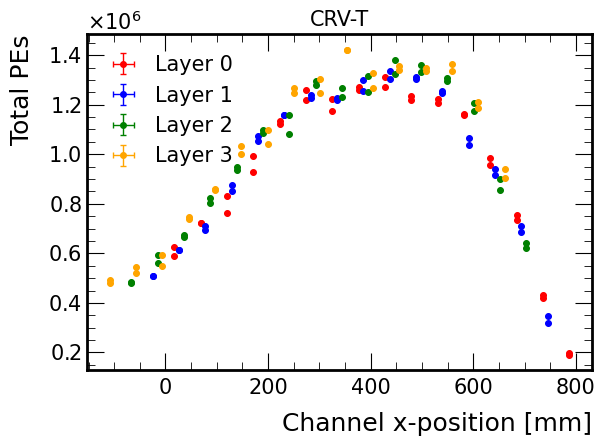


---> Wrote:
	 ../Images/h1o_CRV_L_end_PEsPerLayer_vs_x.png


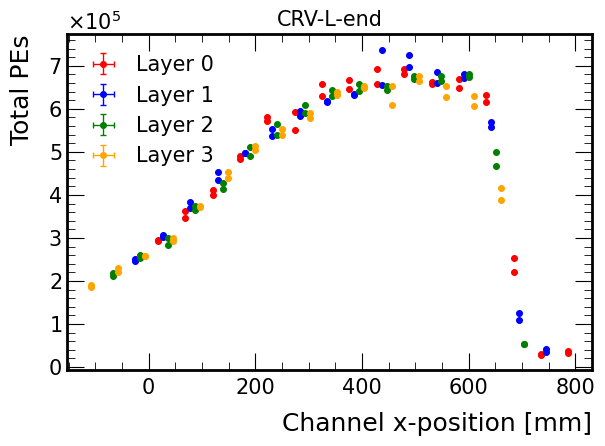

In [22]:
def PEs_per_layer_plots(arrays_):
    # Trigger paddle width, a guess 
    pad_w = 100 # mm
    fid_ds_lo = np.mean(arrays_['run']['x_DS'][0]) - 50 
    fid_ds_hi = np.mean(arrays_['run']['x_DS'][0]) + 50 
                        
    # print(np.mean(arrays_['run']['x_DS'][0]) + 50)
    # print(np.mean(arrays_['run']['x_DS'][0]) - 50)
    
    pl.PlotGraphOverlay( 
        {
            'Layer 0' : [arrays_['run']['x_DS'][0], ak.sum(arrays_['run']['PEs_DS_0'], axis=0), None, None], 
            'Layer 1' : [arrays_['run']['x_DS'][0], ak.sum(arrays_['run']['PEs_DS_1'], axis=0), None, None], 
            'Layer 2' : [arrays_['run']['x_DS'][0], ak.sum(arrays_['run']['PEs_DS_2'], axis=0), None, None], 
            'Layer 3' : [arrays_['run']['x_DS'][0], ak.sum(arrays_['run']['PEs_DS_3'], axis=0), None, None]
        },
        xlabel='Channel x-position [mm]', ylabel='Total PEs', title='CRV-DS', 
        # x_lines = [fid_ds_lo, fid_ds_hi],
        save=True, fout='../Images/h1o_CRV_DS_PEsPerLayer_vs_x.png'
    )
    
    pl.PlotGraphOverlay( 
        {
            'Layer 0' : [arrays_['run']['x_TL_0'][0], ak.sum(arrays_['run']['PEs_T_0'], axis=0), None, None], 
            'Layer 1' : [arrays_['run']['x_TL_1'][0], ak.sum(arrays_['run']['PEs_T_1'], axis=0), None, None], 
            'Layer 2' : [arrays_['run']['x_TL_2'][0], ak.sum(arrays_['run']['PEs_T_2'], axis=0), None, None], 
            'Layer 3' : [arrays_['run']['x_TL_3'][0], ak.sum(arrays_['run']['PEs_T_3'], axis=0), None, None]
        },
        xlabel='Channel x-position [mm]', ylabel='Total PEs', title='CRV-T', 
        # x_lines = [250, 625], leg_pos='upper left',
        leg_pos='upper left',
        save=True, fout='../Images/h1o_CRV_T_PEsPerLayer_vs_x.png'
    )
    
    pl.PlotGraphOverlay( 
        {
            'Layer 0' : [arrays_['run']['x_TL_0'][0], ak.sum(arrays_['run']['PEs_L_end_0'], axis=0), None, None], 
            'Layer 1' : [arrays_['run']['x_TL_1'][0], ak.sum(arrays_['run']['PEs_L_end_1'], axis=0), None, None], 
            'Layer 2' : [arrays_['run']['x_TL_2'][0], ak.sum(arrays_['run']['PEs_L_end_2'], axis=0), None, None], 
            'Layer 3' : [arrays_['run']['x_TL_3'][0], ak.sum(arrays_['run']['PEs_L_end_3'], axis=0), None, None]
        },
        xlabel='Channel x-position [mm]', ylabel='Total PEs', title='CRV-L-end', 
        # x_lines = [625],
        leg_pos='upper left',
        save=True, fout='../Images/h1o_CRV_L_end_PEsPerLayer_vs_x.png'
    )
    return

# PEs_per_layer_plots(arrays_)
PEs_per_layer_plots(masked_arrays_)
    

In [23]:
# From Tyler: https://mu2e-docdb.fnal.gov/cgi-bin/sso/ShowDocument?docid=47621
# Track points <= 32 (muons should leave only 1 or 2 hits per layer)
# Track Chi2 per # of degrees of freedom < 30 (ensures we only keeps events with good linear fits)
# Total PEs < 3000 (to distinguish muons from EM activity)

In [24]:
# Fiducial cut
# Cuts based on total PEs per counter 
# Should roughly correspond to area of trigger paddle maximum efficiency 
# This seems to make things signicantly worse 

def fid_cut(arrays_): 

    # CRV-DS 
    fid_DS_lo = 660
    fid_DS_hi = 860
    
    for i_layer in range(4): 
        arrays_['run'][f'PEs_DS_{i_layer}'] = ak.mask(
            arrays_['run'][f'PEs_DS_{i_layer}'], 
            (arrays_['run']['x_DS'] > fid_DS_lo) & (arrays_['run']['x_DS'] < fid_DS_hi)
        )
    
    # CRV-TL 
    fid_TL_lo = 250 
    fid_TL_hi = 625
    
    for i_layer in range(4): 
        
        arrays_['run'][f'PEs_T_{i_layer}'] = ak.mask(
            arrays_['run'][f'PEs_T_{i_layer}'], 
            (arrays_['run'][f'x_TL_{i_layer}'] > fid_TL_lo) & (arrays_['run'][f'x_TL_{i_layer}'] < fid_TL_hi)
        )
        
        arrays_['run'][f'PEs_L_end_{i_layer}'] = ak.mask(
            arrays_['run'][f'PEs_L_end_{i_layer}'], 
            (arrays_['run'][f'x_TL_{i_layer}'] > fid_TL_lo) & (arrays_['run'][f'x_TL_{i_layer}'] < fid_TL_hi)
        )

    return


# # Reset x-positions

# pl.PlotGraphOverlay( 
#     {
#         'Layer 0' : [masked_arrays_['run']['x_DS'][0], ak.sum(masked_arrays_['run']['PEs_DS_0'], axis=0), None, None], 
#         'Layer 1' : [masked_arrays_['run']['x_DS'][0], ak.sum(masked_arrays_['run']['PEs_DS_1'], axis=0), None, None], 
#         'Layer 2' : [masked_arrays_['run']['x_DS'][0], ak.sum(masked_arrays_['run']['PEs_DS_2'], axis=0), None, None], 
#         'Layer 3' : [masked_arrays_['run']['x_DS'][0], ak.sum(masked_arrays_['run']['PEs_DS_3'], axis=0), None, None]
#     },
#     xlabel='Channel x-position [mm]', ylabel='Total PEs', title='CRV-DS', 
#     x_lines = [660, 860],
#     save=True, fout='../Images/h1o_CRV_DS_PEsPerLayer_vs_x_cut.png'
# )


# pl.PlotGraphOverlay( 
#     {
#         'Layer 0' : [masked_arrays_['run']['x_TL_0'][0], ak.sum(masked_arrays_['run']['PEs_T_0'], axis=0), None, None], 
#         'Layer 1' : [masked_arrays_['run']['x_TL_1'][0], ak.sum(masked_arrays_['run']['PEs_T_1'], axis=0), None, None], 
#         'Layer 2' : [masked_arrays_['run']['x_TL_2'][0], ak.sum(masked_arrays_['run']['PEs_T_2'], axis=0), None, None], 
#         'Layer 3' : [masked_arrays_['run']['x_TL_3'][0], ak.sum(masked_arrays_['run']['PEs_T_3'], axis=0), None, None]
#     },
#     xlabel='Channel x-position [mm]', ylabel='Total PEs', title='CRV-T', 
#     x_lines = [250, 625], leg_pos='upper left',
#     save=True, fout='../Images/h1o_CRV_T_PEsPerLayer_vs_x_cut.png'
# )

# pl.PlotGraphOverlay( 
#     {
#         'Layer 0' : [masked_arrays_['run']['x_TL_0'][0], ak.sum(masked_arrays_['run']['PEs_L_end_0'], axis=0), None, None], 
#         'Layer 1' : [masked_arrays_['run']['x_TL_1'][0], ak.sum(masked_arrays_['run']['PEs_L_end_1'], axis=0), None, None], 
#         'Layer 2' : [masked_arrays_['run']['x_TL_2'][0], ak.sum(masked_arrays_['run']['PEs_L_end_2'], axis=0), None, None], 
#         'Layer 3' : [masked_arrays_['run']['x_TL_3'][0], ak.sum(masked_arrays_['run']['PEs_L_end_3'], axis=0), None, None]
#     },
#     xlabel='Channel x-position [mm]', ylabel='Total PEs', title='CRV-L-end', 
#     x_lines = [250, 625], leg_pos='upper left',
#     save=True, fout='../Images/h1o_CRV_L_end_PEsPerLayer_vs_x_cut.png'
# )

In [25]:
# # Time cut
# tot_PEs_cut(masked_arrays_) 
# pr.PrintNEvents(arrays_['run'], 1)
# pr.PrintNEvents(masked_arrays_['run'], 1)

# pl.Plot1DOverlay( { "No cut" : ak.flatten(arrays_['run']['PEsPerEvent'], axis=None), 
#                    "Cuts" : ak.flatten(masked_arrays_['run']['PEsPerEvent'], axis=None), 
#                   }, 
#                  nbins=600, xmin=1, xmax=6000, 
#                  xlabel='Total PEs', ylabel='Events',
#                  save=False) 

## Get triggers 

In [26]:
# I think this needs to happen before we cut
# No, I think that will just bias you towards always doing better with cuts on. 

# min_PEs = 10 

#     arrays_['run']['meas_T_0'] = ak.values_astype(ak.sum(arrays_['run']['PEs_T_0'], axis=-1) > min_PEs, 'int')
#     arrays_['run']['meas_T_1'] = ak.values_astype(ak.sum(arrays_['run']['PEs_T_1'], axis=-1) > min_PEs, 'int')
#     arrays_['run']['meas_T_2'] = ak.values_astype(ak.sum(arrays_['run']['PEs_T_2'], axis=-1) > min_PEs, 'int')
#     arrays_['run']['meas_T_3'] = ak.values_astype(ak.sum(arrays_['run']['PEs_T_3'], axis=-1) > min_PEs, 'int')
#     arrays_['run']['meas'] = ak.values_astype((arrays_['run']['meas_T_0'] + arrays_['run']['meas_T_1'] + arrays_['run']['meas_T_2'] + arrays_['run']['meas_T_3']) >= min_layers, 'bool')
#     nfail = len(arrays_['run'][~arrays_['run']['meas']]) 

def get_triggers(arrays_, min_PEs=10):
    arrays_['run']['trig_L_end_0'] = ak.values_astype(ak.sum(arrays_['run']['PEs_L_end_0'], axis=-1) > min_PEs, 'int')
    arrays_['run']['trig_L_end_1'] = ak.values_astype(ak.sum(arrays_['run']['PEs_L_end_1'], axis=-1) > min_PEs, 'int')
    arrays_['run']['trig_L_end_2'] = ak.values_astype(ak.sum(arrays_['run']['PEs_L_end_2'], axis=-1) > min_PEs, 'int')
    arrays_['run']['trig_L_end_3'] = ak.values_astype(ak.sum(arrays_['run']['PEs_L_end_3'], axis=-1) > min_PEs, 'int')
    
    arrays_['run']['trig_DS_0'] = ak.values_astype(ak.sum(arrays_['run']['PEs_DS_0'], axis=-1) > min_PEs, 'int')
    arrays_['run']['trig_DS_1'] = ak.values_astype(ak.sum(arrays_['run']['PEs_DS_1'], axis=-1) > min_PEs, 'int')
    arrays_['run']['trig_DS_2'] = ak.values_astype(ak.sum(arrays_['run']['PEs_DS_2'], axis=-1) > min_PEs, 'int')
    arrays_['run']['trig_DS_3'] = ak.values_astype(ak.sum(arrays_['run']['PEs_DS_3'], axis=-1) > min_PEs, 'int')
    
    arrays_['run']['trig_L_end'] = ak.values_astype(arrays_['run']['trig_L_end_0'] + arrays_['run']['trig_L_end_1'] + arrays_['run']['trig_L_end_2'] + arrays_['run']['trig_L_end_3'] == 4, 'bool') 
    arrays_['run']['trig_DS'] = ak.values_astype(arrays_['run']['trig_DS_0'] + arrays_['run']['trig_DS_1'] + arrays_['run']['trig_DS_3'] + arrays_['run']['trig_DS_3'] == 4, 'bool') 
    arrays_['run']['trig'] = (arrays_['run']['trig_L_end'] & arrays_['run']['trig_DS']) 
    return

min_PEs = 10 
get_triggers(arrays_, min_PEs)
get_triggers(masked_arrays_, min_PEs)

In [27]:
# print(ak.to_list(arrays_['run']['PEs_L_end_0'][0]))
# print(ak.sum(arrays_['run']['PEs_L_end_0'][0], axis=-1))
# print((0.9944994449615479 + 39.25908660888672 + 45.94257354736328 + 0.9655677676200867 + 1.0543220043182373))

In [28]:
# Easier to debug the False triggers
pr.PrintNEvents(arrays_['run'][~arrays_['run']['trig']], 3)


---> Printing 3 event(s)...

-------------------------------------------------------------------------------------
eventNumber: 4
PEsTemperatureCorrected: [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 1.25, 0, 0, 0, 0], ...]
time: [[nan, nan, nan, nan, nan, nan, ..., nan, 1.57e+03, nan, nan, nan, nan], ...]
PEsPerEvent: 50.26836013793945
FEB0PEsPerEvent: 4.845325469970703
FEB1PEsPerEvent: 8.548802375793457
FEB2PEsPerEvent: 6.978431224822998
FEB3PEsPerEvent: 6.329468250274658
FEB4PEsPerEvent: 6.380244255065918
FEB5PEsPerEvent: 7.158110618591309
FEB6PEsPerEvent: 3.835498094558716
FEB7PEsPerEvent: 6.192478179931641
PEs_L_end_0: [0, 0, 0.774, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
PEs_L_end_1: [0, 0, 0, 0.912, 0, 0, 0, 0, 0, 0.987, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
PEs_L_end_2: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
PEs_L_end_3: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.48, 0]
PEs_DS

In [29]:
# Filter untriggered events
def filter_triggers(arrays_):
    arrays_['run'] = arrays_['run'][arrays_['run']['trig']]
    return

filter_triggers(arrays_)
filter_triggers(masked_arrays_) 

## Get measurements

In [30]:
# arrays_['run']['meas_T_0'] = ak.values_astype(ak.sum(arrays_['run']['PEs_T_0'], axis=-1) > min_PEs, 'int')
# arrays_['run']['meas_T_1'] = ak.values_astype(ak.sum(arrays_['run']['PEs_T_1'], axis=-1) > min_PEs, 'int')
# arrays_['run']['meas_T_2'] = ak.values_astype(ak.sum(arrays_['run']['PEs_T_2'], axis=-1) > min_PEs, 'int')
# arrays_['run']['meas_T_3'] = ak.values_astype(ak.sum(arrays_['run']['PEs_T_3'], axis=-1) > min_PEs, 'int')
# arrays_['run']['meas'] = ak.values_astype((arrays_['run']['meas_T_0'] + arrays_['run']['meas_T_1'] + arrays_['run']['meas_T_2'] + arrays_['run']['meas_T_3']) >= min_layers, 'bool')
# ntrig = len(arrays_['run'][arrays_['run']['trig']])
# nfail = len(arrays_['run'][~arrays_['run']['meas']]) 

def get_failures(arrays_, min_PEs=10, min_layers=2): 
    arrays_['run']['meas_T_0'] = ak.values_astype(ak.sum(arrays_['run']['PEs_T_0'], axis=-1) > min_PEs, 'int')
    arrays_['run']['meas_T_1'] = ak.values_astype(ak.sum(arrays_['run']['PEs_T_1'], axis=-1) > min_PEs, 'int')
    arrays_['run']['meas_T_2'] = ak.values_astype(ak.sum(arrays_['run']['PEs_T_2'], axis=-1) > min_PEs, 'int')
    arrays_['run']['meas_T_3'] = ak.values_astype(ak.sum(arrays_['run']['PEs_T_3'], axis=-1) > min_PEs, 'int')
    arrays_['run']['meas'] = ak.values_astype((arrays_['run']['meas_T_0'] + arrays_['run']['meas_T_1'] + arrays_['run']['meas_T_2'] + arrays_['run']['meas_T_3']) >= min_layers, 'bool')
    nfail = len(arrays_['run'][~arrays_['run']['meas']]) 
    return nfail



    # meas_T_0 = ak.values_astype(ak.sum(arrays_['run']['PEs_T_0'], axis=-1) > min_PEs, 'int')
    # meas_T_1 = ak.values_astype(ak.sum(arrays_['run']['PEs_T_1'], axis=-1) > min_PEs, 'int')
    # meas_T_2 = ak.values_astype(ak.sum(arrays_['run']['PEs_T_2'], axis=-1) > min_PEs, 'int')
    # meas_T_3 = ak.values_astype(ak.sum(arrays_['run']['PEs_T_3'], axis=-1) > min_PEs, 'int')
    # meas = ak.values_astype((meas_T_0 + meas_T_1 + meas_T_2 + meas_T_3) >= min_layers, 'bool')
    # ntrig = len(arrays_['run'][arrays_['run']['trig']])
    # nfail = len(arrays_['run'][~meas]) 
    # ineff = nfail / ntrig 
    # return nfail, ineff
print(ak.sum(arrays_['run']['PEs_T_0'][0], axis=-1))


243.02376


In [31]:
# Uncertainty 
from statsmodels.stats.proportion import proportion_confint
# k: n_failures, N: n_triggers
def wilson_unc(k, N, conservative=True): 
    lower, upper = proportion_confint(k, N, method="wilson")
    point = k/N
    if conservative: 
        return abs((upper - point) / 2)
    else:
        return abs((lower - point) / 2)

In [32]:
# ntrig = len(arrays_['run'][arrays_['run']['trig']])
# # nfail = len(arrays_['run'][~arrays_['run']['meas']]) 
# nfail = get_failures(arrays_) 
# ineff = nfail / ntrig 
# print(f'Inefficiency: {nfail}/{ntrig} = {100*ineff}%')

In [33]:
def scan_ineff(arrays_):
    ntrig = len(arrays_['run'][arrays_['run']['trig']])
    nfail_ = []
    ineff_ = []
    ineff_err_ = []
    PEs_ = np.linspace(10, 100, 25)
    print('\nThreshold, Total, Failures, Inefficiency') 
    for min_PEs in PEs_:
        nfail = get_failures(arrays_, min_PEs=min_PEs)
        nfail_.append(nfail) 
        ineff = nfail / ntrig 
        ineff_.append(ineff)
        ineff_err = wilson_unc(nfail, ntrig)
        ineff_err_.append(ineff_err)
        print(f'{min_PEs}, {ntrig}, {nfail}, {ineff}, {ineff_err}')
    return {'PEs' : PEs_, 'nfail' : nfail_, 'ineff' : ineff_, 'ineff_err' : ineff_err_}

no_cuts_ = scan_ineff(arrays_)
cuts_ = scan_ineff(masked_arrays_)


Threshold, Total, Failures, Inefficiency
10.0, 126904, 757, 0.0059651390027107105, 0.00021943783662060424
13.75, 126904, 1003, 0.00790361217928513, 0.0002511539605930032
17.5, 126904, 1058, 0.008337010653722499, 0.0002576792033776058
21.25, 126904, 1092, 0.008604929710647418, 0.0002616262574032637
25.0, 126904, 1118, 0.008809808989472357, 0.00026460221139250513
28.75, 126904, 1133, 0.00892800857340982, 0.00026630295574441194
32.5, 126904, 1144, 0.009014688268297296, 0.000267542827583794
36.25, 126904, 1154, 0.009093487990922272, 0.0002686646776470583
40.0, 126904, 1167, 0.00919592763033474, 0.00027011563756803875
43.75, 126904, 1178, 0.009282607325222215, 0.00027133689384616425
47.5, 126904, 1183, 0.009322007186534703, 0.00027189007094015685
51.25, 126904, 1192, 0.009392926936897182, 0.0002728827670281297
55.0, 126904, 1201, 0.00946384668725966, 0.0002738716138377508
58.75, 126904, 1210, 0.00953476643762214, 0.00027485665411397693
62.5, 126904, 1221, 0.009621446132509613, 0.0002760554

In [34]:
# def get_ineff(arrays_, n):
#     ntrig = len(arrays_['run'][arrays_['run']['trig']])
#     nfail_ = []
#     # ineff_ = []
#     # ineff_err_ = []
#     PEs_ = np.linspace(10, 100, 25)
#     print('\nThreshold, Total, Failures, Inefficiency') 
#     for min_PEs in PEs_:
#         nfail = get_failures(arrays_, min_PEs=min_PEs)
#         nfail_.append(nfail) 
        
#         # ineff = nfail / ntrig 
#         # ineff_.append(ineff)
#         # ineff_err_.append(wilson_unc(nfail, ntrig))
#         # print(f'{min_PEs}, {ntrig}, {nfail}, {ineff}')
#     # Plot
#     # pl.PlotGraph(x=PEs_, y=ineff_, yerr=ineff_err_,
#     #      title=title, xlabel='PE threshold', ylabel='Inefficiency', 
#     #      log_y=True, col='red',
#     #      save=True, fout=f'../Images/gr_ineff_{tag}.png')
#     return PEs_, nfail_, # ineff_, [0]*len(ineff_err_), ineff_err_]

# no_cuts_ = scan_ineff(arrays_, 'No cuts', 'raw')
# cuts_ = scan_ineff(masked_arrays_, 'Cuts', 'cut')


---> Wrote:
	 ../Images/h1o_nfail.png


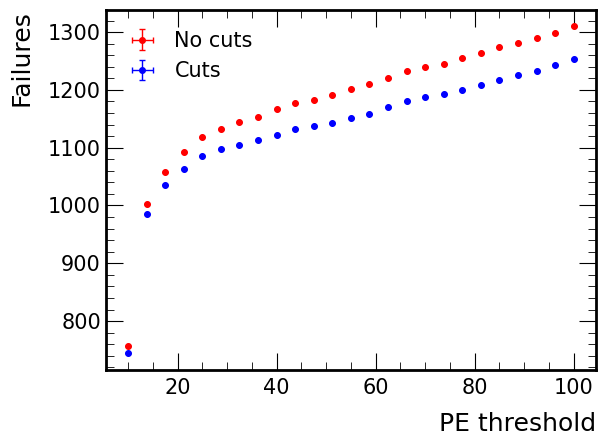


---> Wrote:
	 ../Images/h1o_ineff.png


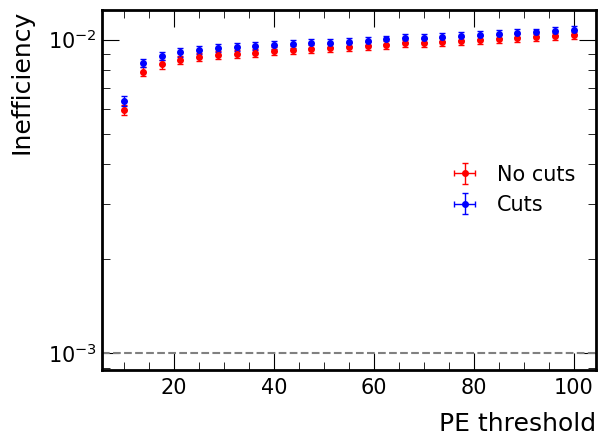

In [35]:
# print(no_cuts_['PEs'])
# no_cuts_ = scan_ineff(arrays_, 'No cuts', 'raw')
# cuts_ = scan_ineff(masked_arrays_, 'Cuts', 'cut')

pl.PlotGraphOverlay( 
    {
        'No cuts' : [no_cuts_['PEs'], no_cuts_['nfail'], None, None],
        'Cuts' : [cuts_['PEs'], cuts_['nfail'], None, None]
    },
    xlabel='PE threshold', ylabel='Failures', 
    # y_lines = [1e-3], log_y=True,
    save=True, fout='../Images/h1o_nfail.png'
)



pl.PlotGraphOverlay( 
    {
        'No cuts' : [no_cuts_['PEs'], no_cuts_['ineff'], None, no_cuts_['ineff_err']],
        'Cuts' : [cuts_['PEs'], cuts_['ineff'], None, cuts_['ineff_err']]
    },
    xlabel='PE threshold', ylabel='Inefficiency', 
    y_lines = [1e-3], log_y=True,
    save=True, fout='../Images/h1o_ineff.png'
)

